In [20]:
import pandas as pd
# import all modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
# Import data
print("Reading in data...")
filepath = "C:/Users/fahmida/Desktop/Rental/airbnb/Listings/listings.csv"
df= pd.read_csv(filepath, header=0, index_col=None)


Reading in data...


In [2]:
calendar = pd.read_csv('C:/Users/fahmida/Desktop/Rental/airbnb/calendar/calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

('We have', 365, 'days and', 19255, 'unique listings in the calendar data.')


In [3]:
calendar.date.min(), calendar.date.max()

('2018-12-06', '2019-12-05')

In [4]:
calendar.available.value_counts()

f    4435920
t    2592155
Name: available, dtype: int64

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


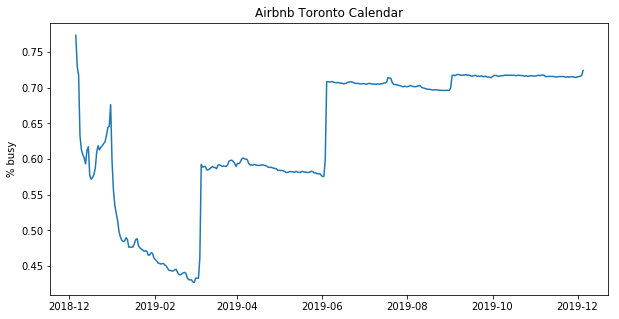

In [5]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Toronto Calendar')
plt.ylabel('% busy')
plt.show();

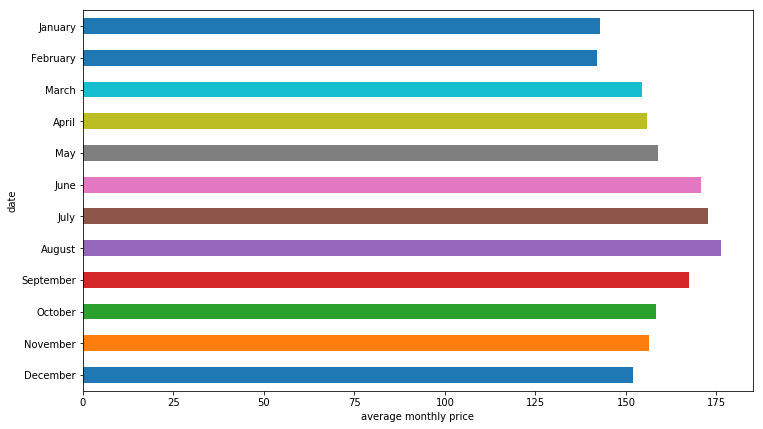

In [6]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

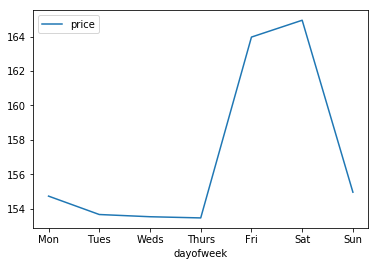

In [7]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

In [8]:
listings = pd.read_csv('C:/Users/fahmida/Desktop/Rental/airbnb/Listings/listings.csv')
print('We have', listings.id.nunique(), 'listings in the listing data.')
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

('We have', 19255, 'listings in the listing data.')


,id
neighbourhood_cleansed,
Waterfront Communities-The Island,3443
Niagara,849
Annex,749
Church-Yonge Corridor,666
Dovercourt-Wallace Emerson-Junction,556
Kensington-Chinatown,526
Bay Street Corridor,524
Little Portugal,516
Willowdale East,488


C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


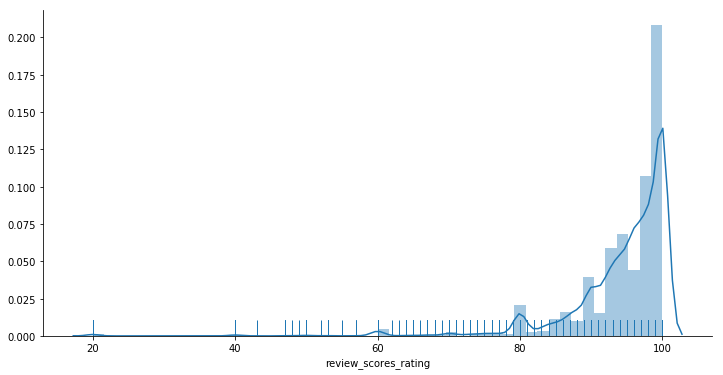

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [10]:
listings.review_scores_rating.describe()

count    15262.000000
mean        94.334819
std          7.869151
min         20.000000
25%         92.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [11]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings['price'].describe()


count    19255.000000
mean       139.749935
std        210.438228
min          0.000000
25%         65.000000
50%        100.000000
75%        158.000000
max      13315.000000
Name: price, dtype: float64

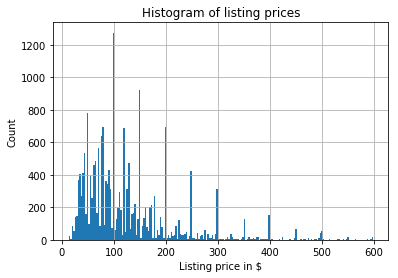

In [12]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

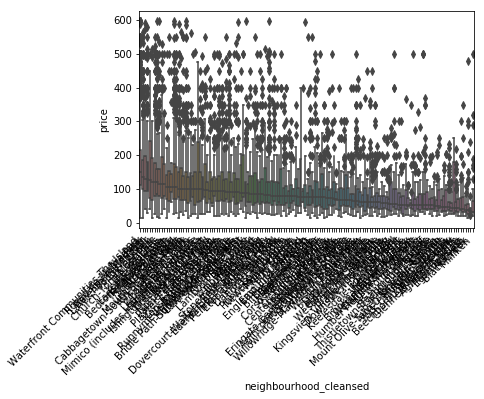

In [13]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

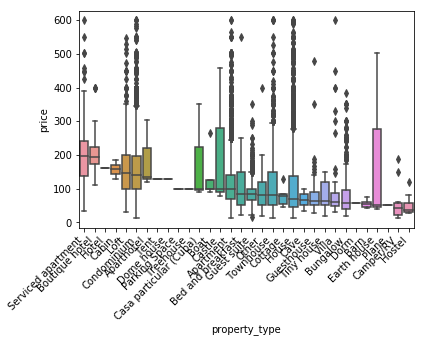

In [14]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

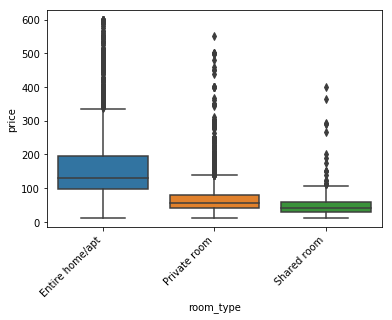

In [15]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

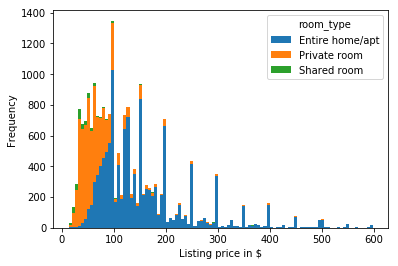

In [16]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');

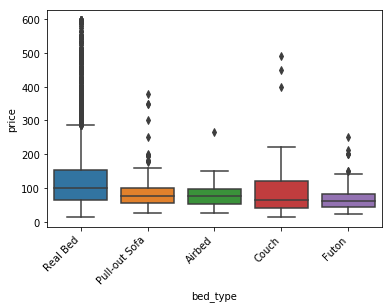

In [17]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [18]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")
listings['amenities'].head()

0    TV,Internet,Wifi,Air conditioning,Kitchen,Indo...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Poo...
2    Wifi,Air conditioning,Kitchen,Free parking on ...
3    Internet,Wifi,Pets live on this property,Cat(s...
4    Internet,Wifi,Air conditioning,Kitchen,Free pa...
Name: amenities, dtype: object

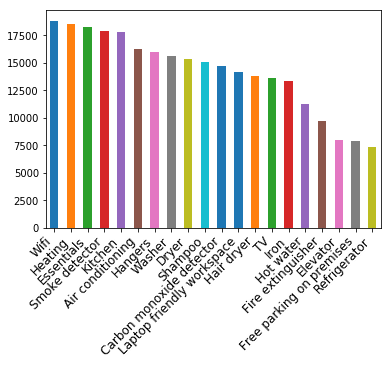

In [21]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

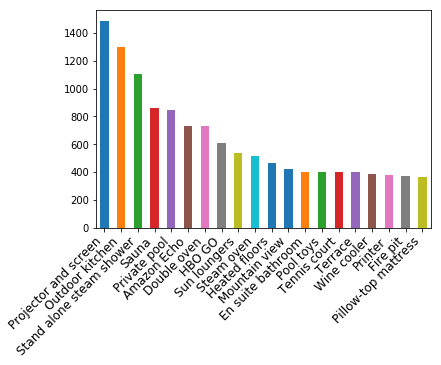

In [22]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

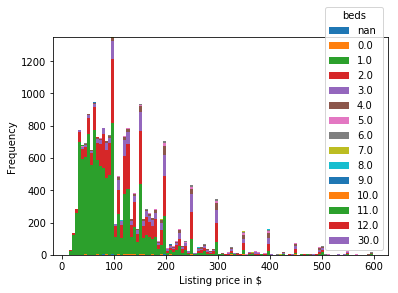

In [23]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

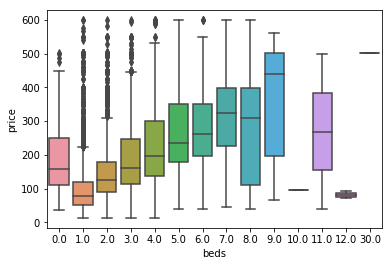

In [24]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.show();

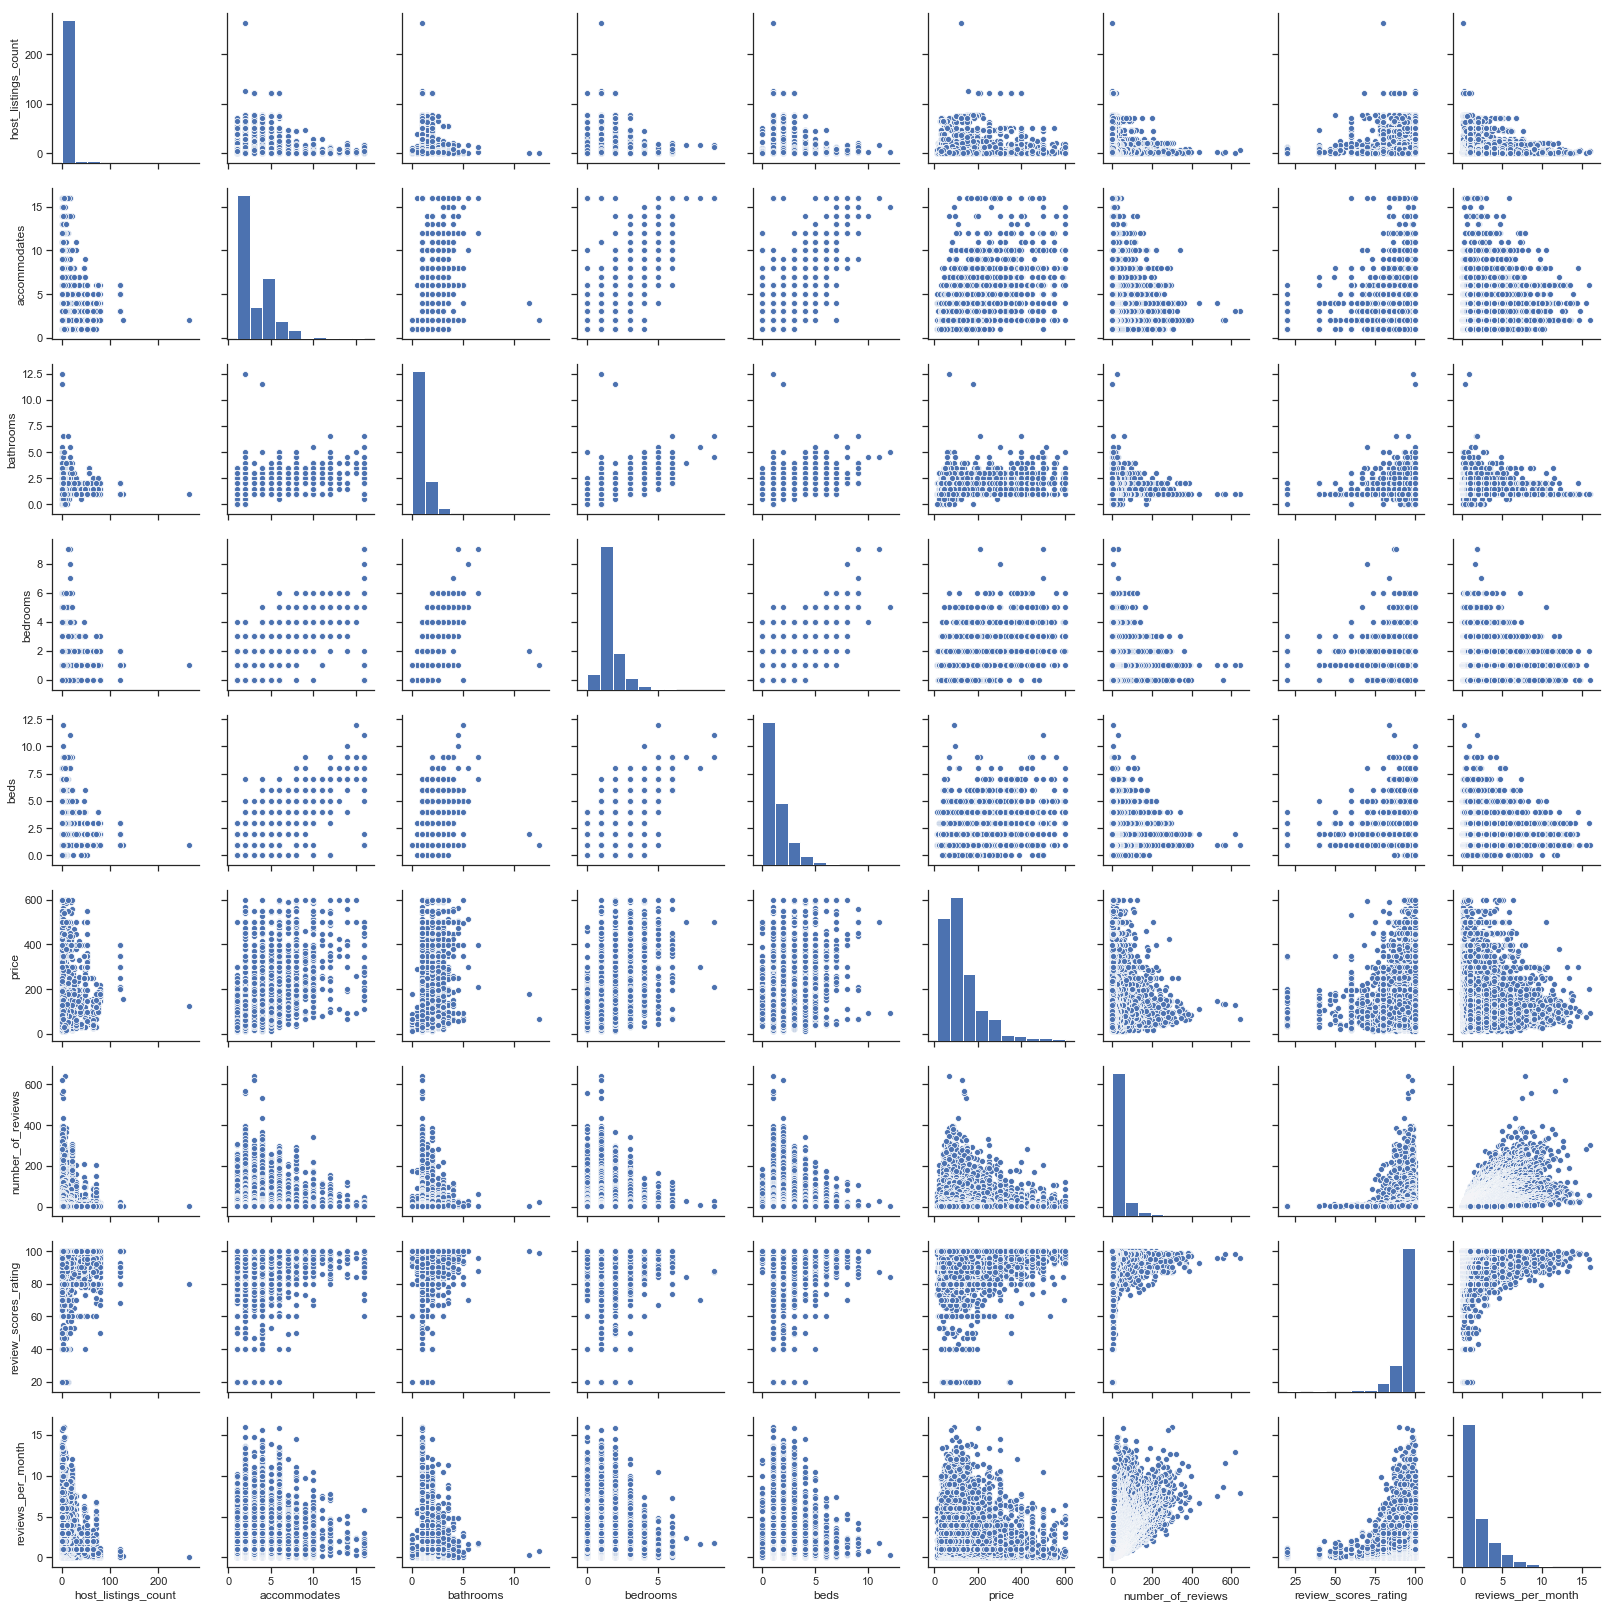

In [25]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
sns.pairplot(listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna())
plt.show();

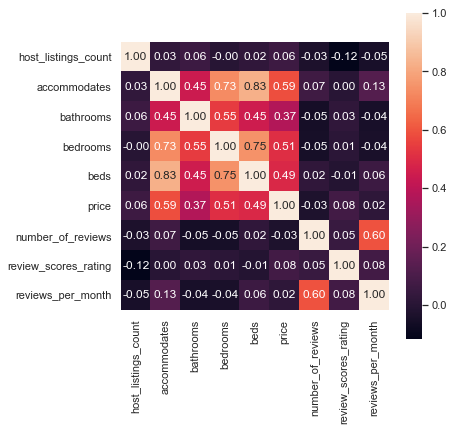

In [26]:
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

In [30]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

In [31]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

In [32]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]


In [33]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

In [35]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

In [36]:
#### Random Forest Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 1.000
R^2 test: 0.173


In [37]:
#Feature importance of Random Forest
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
2808,M4W 3S5,0.099117
14,bedrooms,0.086767
13,bathrooms,0.070423
3983,M5V 0L4,0.054031
9,cleaning_fee,0.044880
5699,M6P 1S1,0.027799
6719,Entire home/apt,0.027378
16,number_of_reviews,0.023838
8,security_deposit,0.021797
3196,M5A 4E8,0.018616


In [40]:
git clone --recursive https://github.com/Microsoft/LightGBM.git
cd LightGBM/python-package
# export CXX=g++-7 CC=gcc-7  # macOS users, if you decided to compile with gcc, don't forget to specify compilers (replace "7" with version of gcc installed on your machine)
python setup.py install
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

SyntaxError: invalid syntax (<ipython-input-40-216bb10f1d4e>, line 1)

In [ ]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))